#### Insurance Claim Fraud Detection

##### Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables--

1. months_as_customer: Number of months of patronage
2. age: the length of time a customer has lived or a thing has existed
3. policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4. policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5. policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6. policy_csl: is basically Combined Single Limit
7. policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8. policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9. umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10. insured_zip: It is the zip code where the insurance was made
11. insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12. insured_education_level: This refers to the Level of education of the customer
13. insured_occupation: This refers Occupation of the customer
14. insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15. insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16. capital-gains: This refers to profit accrued due to insurance premium
17. capital-loss: This refers to the losses incurred due to insurance claims
18. incident_date: This refers to the date which claims where made by customers
19. incident_type: This refers to the type of claim/vehicle damage made by customer
20. collision_type: This refers to the area of damage on the vehicle
21. incident_severity: This refers to the extent/level of damage
22. authorities_contacted: This refers to the government agencies that were contacted after damage
23. incident_state: This refers to the state at which the accident happened
24. incident_city: This refers to the city at which the accident happened
25. 1ncident_location: This refers to the location at which the accident happened
26. incident_hour_of_the_day: The period of the day which accident took place
27. number_of_vehicles_involved: This refers to number of vehicles involved the accident
28. property_damage: This refers to whether property was damaged or not
29. bodily_injuries: This refers to injuries sustained
30. witnesses: This refers to the number of witnesses involved
31. police_report_available: This refers to whether the report on damage was documented or not
32. total_claim_amount: This refers to the financial implications involved in claims
33. injury_claim: This refers to physical injuries sustained
34. property_claim: This refers to property damages during incident
35. vehicle_claim: This refers to property damages during incident
36. auto_make: This refers to the make of the vehicle
37. auto_model: This refers to the model of the vehicle
38. auto_year: This refers to the year which the vehicle was manufactured
39. _c39:
40. fraud_reported


In [1]:
# importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
claim_data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
claim_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
claim_data.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [4]:
# checking for column names and dimensions
print(claim_data.columns)
print()
print("Shape of the Dataset :", claim_data.shape)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Shape of the Dataset : (1000, 40)


The dataset contains details about 1000 insurance claims and 40 different features.

In [5]:
# checking for null values in the dataset
claim_data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 colum contains only null values. So, we will drop this column.

In [6]:
claim_data = claim_data.drop('_c39', axis=1)
claim_data.shape

(1000, 39)

In [7]:
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

The dataset conatins 21 categorical columns and 18 numerical columns.

In [8]:
# statistical summary of the numerical columns in the dataset
claim_data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [9]:
# summary of the categorical columns in the dataset
claim_data.describe(include=[object]).T

,count,unique,top,freq
policy_bind_date,1000,951,28-04-1992,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,02-02-2015,28
incident_type,1000,4,Multi-vehicle Collision,419


The count for all the columns(numerical and categorical) are same(no null values).

In [10]:
# checking for unique values
claim_data.nunique().sort_values()

fraud_reported                    2
insured_sex                       2
police_report_available           3
bodily_injuries                   3
policy_state                      3
policy_csl                        3
policy_deductable                 3
property_damage                   3
witnesses                         4
number_of_vehicles_involved       4
incident_severity                 4
incident_type                     4
collision_type                    4
authorities_contacted             5
insured_relationship              6
insured_education_level           7
incident_city                     7
incident_state                    7
umbrella_limit                   11
auto_make                        14
insured_occupation               14
insured_hobbies                  20
auto_year                        21
incident_hour_of_the_day         24
auto_model                       39
age                              46
incident_date                    60
capital-gains               

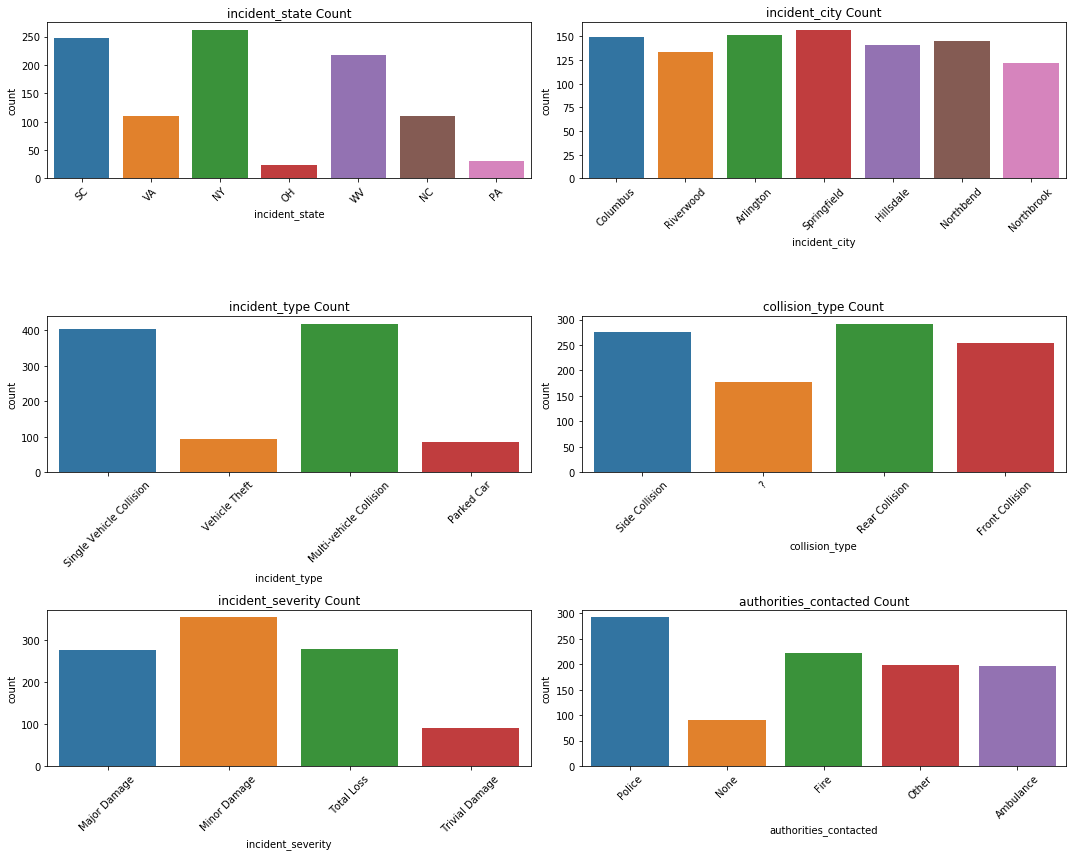

In [11]:
# plotting categorical data related to the incident

cols = ['incident_state','incident_city','incident_type','collision_type','incident_severity','authorities_contacted']

num_cols = len(cols)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed for subplots

plt.figure(figsize=(15, 12))  # Adjust the figsize based on the number of rows

for idx, col in enumerate(cols, start=1):
    plt.subplot(num_rows, 2, idx)  # Create a subplot
    sns.countplot(x=col, data=claim_data)
    plt.xticks(rotation=45)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()

In [12]:
# value count for the columns
for i in cols:
    print(claim_data[i].value_counts())
    print()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64



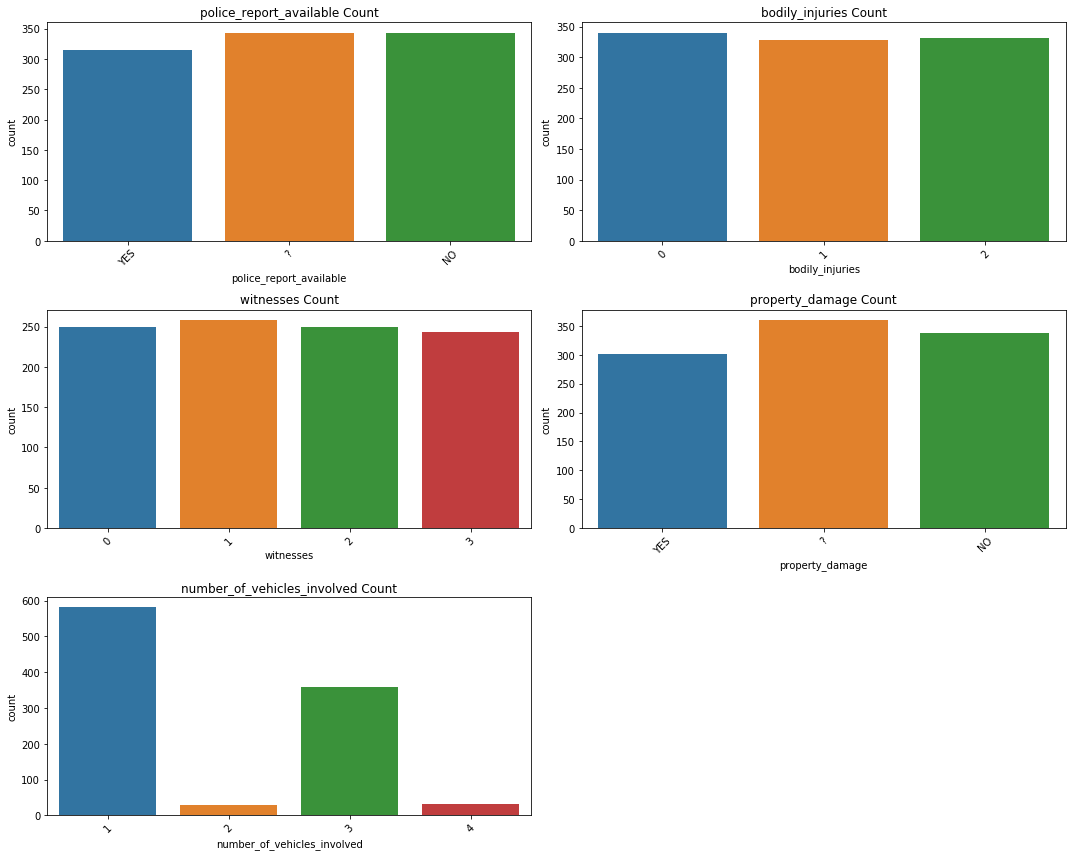

In [13]:
cols = ['police_report_available','bodily_injuries','witnesses','property_damage','number_of_vehicles_involved']

num_cols = len(cols)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed for subplots

plt.figure(figsize=(15, 12))  # Adjust the figsize based on the number of rows

for idx, col in enumerate(cols, start=1):
    plt.subplot(num_rows, 2, idx)  # Create a subplot
    sns.countplot(x=col, data=claim_data)
    plt.xticks(rotation=45)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()

In [14]:
# value count for the columns
cols = ['police_report_available','bodily_injuries','witnesses','property_damage','number_of_vehicles_involved']
for i in cols:
    print(claim_data[i].value_counts())
    print()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64



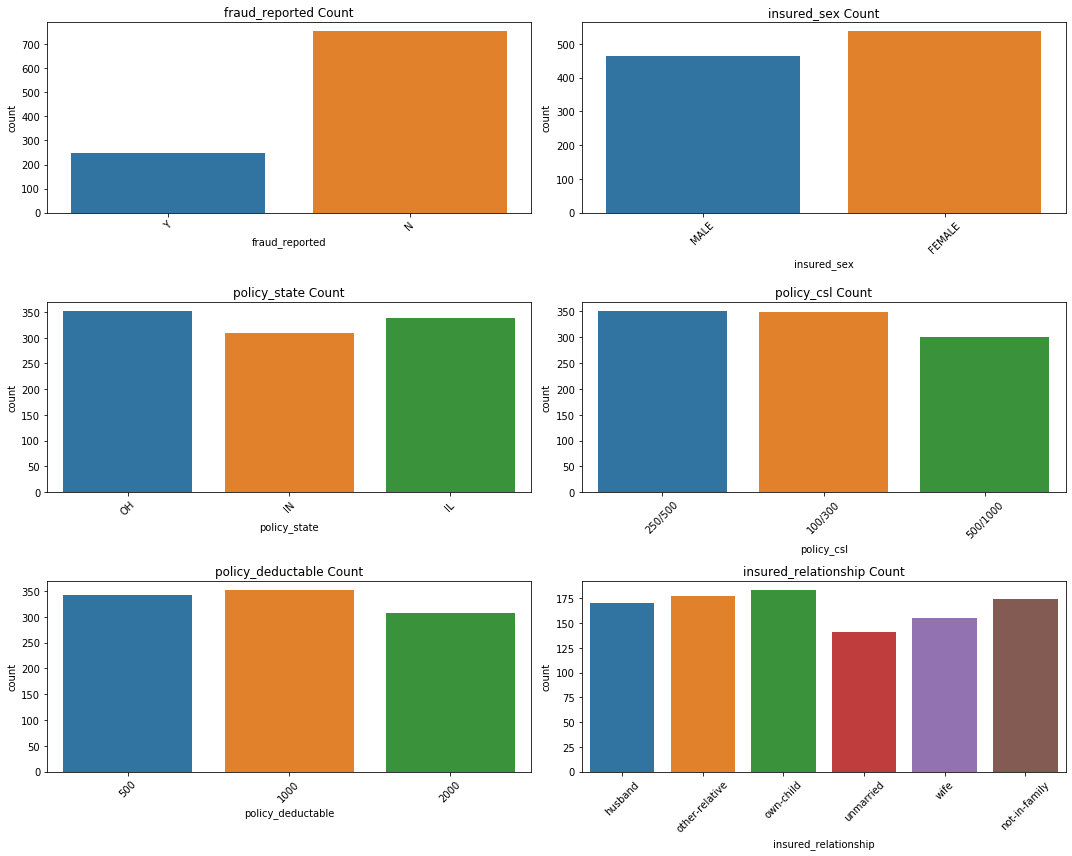

In [15]:
cols = ['fraud_reported','insured_sex','policy_state','policy_csl','policy_deductable','insured_relationship']

num_cols = len(cols)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed for subplots

plt.figure(figsize=(15, 12))  # Adjust the figsize based on the number of rows

for idx, col in enumerate(cols, start=1):
    plt.subplot(num_rows, 2, idx)  # Create a subplot
    sns.countplot(x=col, data=claim_data)
    plt.xticks(rotation=45)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()

In [16]:
for i in cols:
    print(claim_data[i].value_counts())
    print()

N    753
Y    247
Name: fraud_reported, dtype: int64

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64



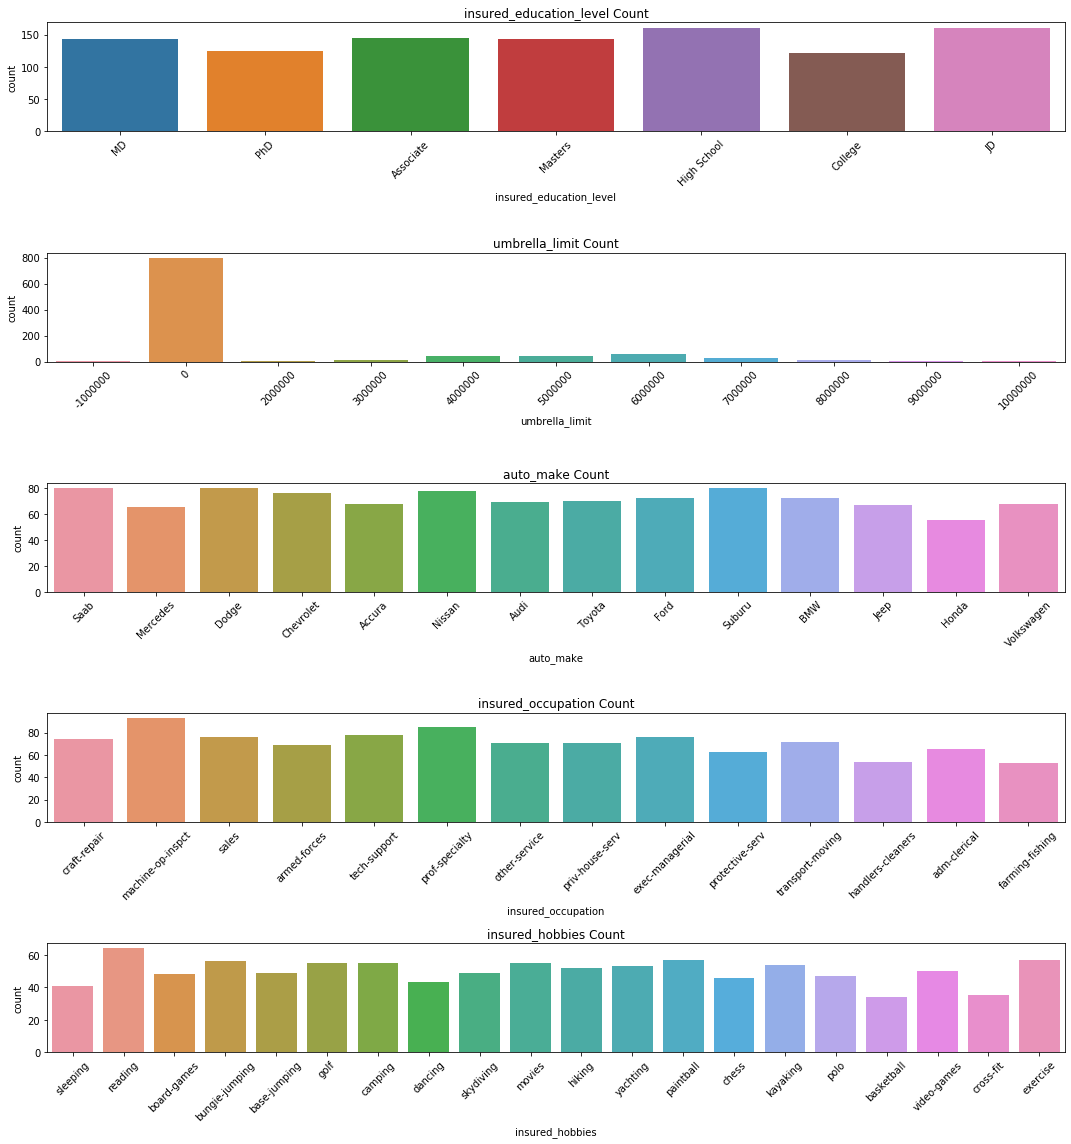

In [17]:
cols=['insured_education_level','umbrella_limit','auto_make','insured_occupation','insured_hobbies']
 
num_rows = len(cols) # Calculate the number of rows needed for subplots

plt.figure(figsize=(15, 16))  # Adjust the figsize based on the number of rows

for idx, col in enumerate(cols, start=1):
    plt.subplot(num_rows, 1, idx)  # Create a subplot
    sns.countplot(x=col, data=claim_data)
    plt.xticks(rotation=45)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()


In [18]:
for i in cols:
    print(claim_data[i].value_counts())
    print()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing   

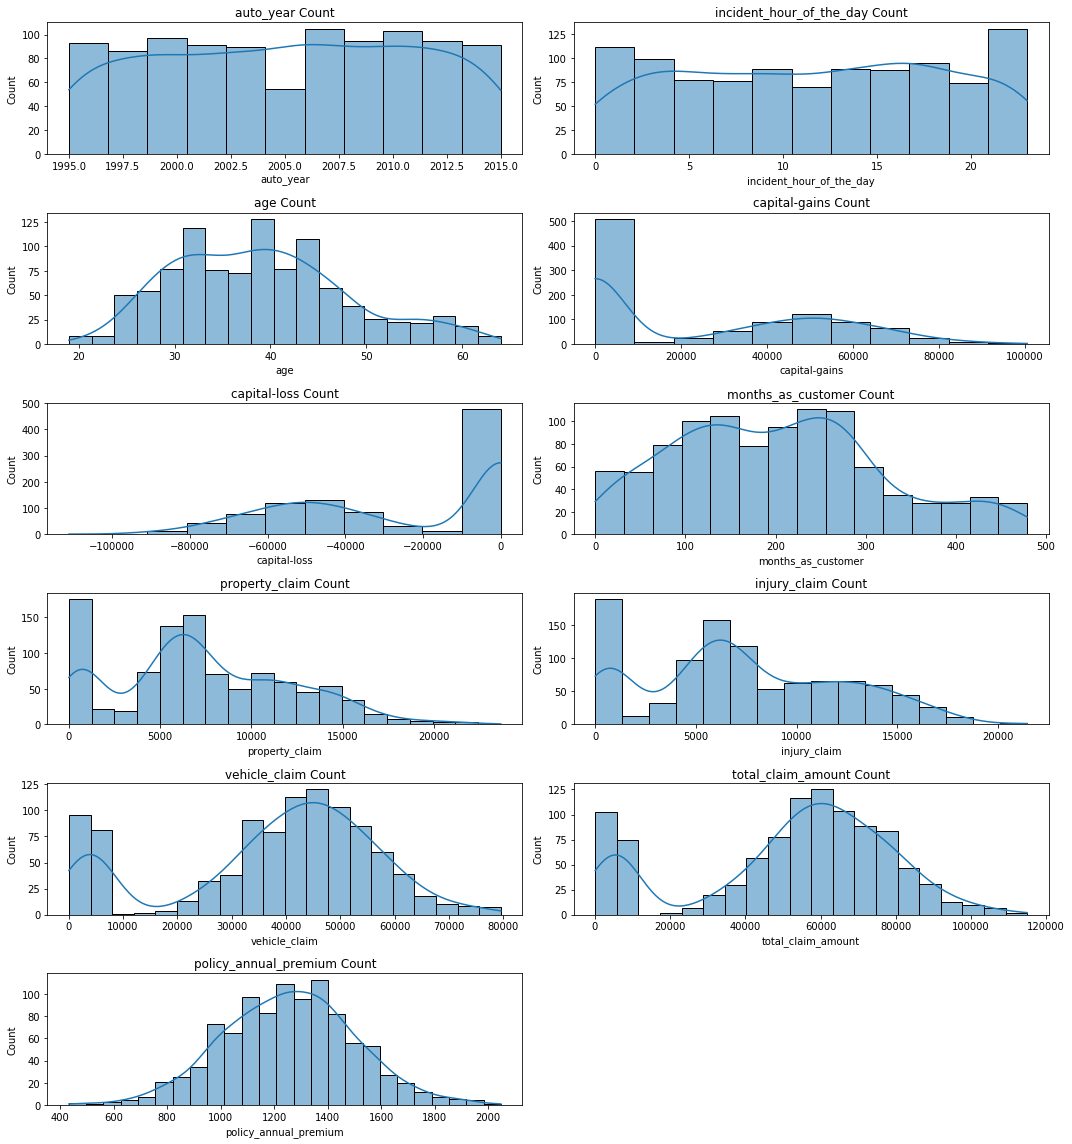

In [19]:
numerical=['auto_year','incident_hour_of_the_day','age','capital-gains','capital-loss','months_as_customer','property_claim',
         'injury_claim','vehicle_claim','total_claim_amount','policy_annual_premium']

num_cols = len(numerical)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed for subplots

plt.figure(figsize=(15, 16))  # Adjust the figsize based on the number of rows

for idx, col in enumerate(numerical, start=1):
    plt.subplot(num_rows, 2, idx)  # Create a subplot
    sns.histplot(x=col, data=claim_data,kde=True)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()

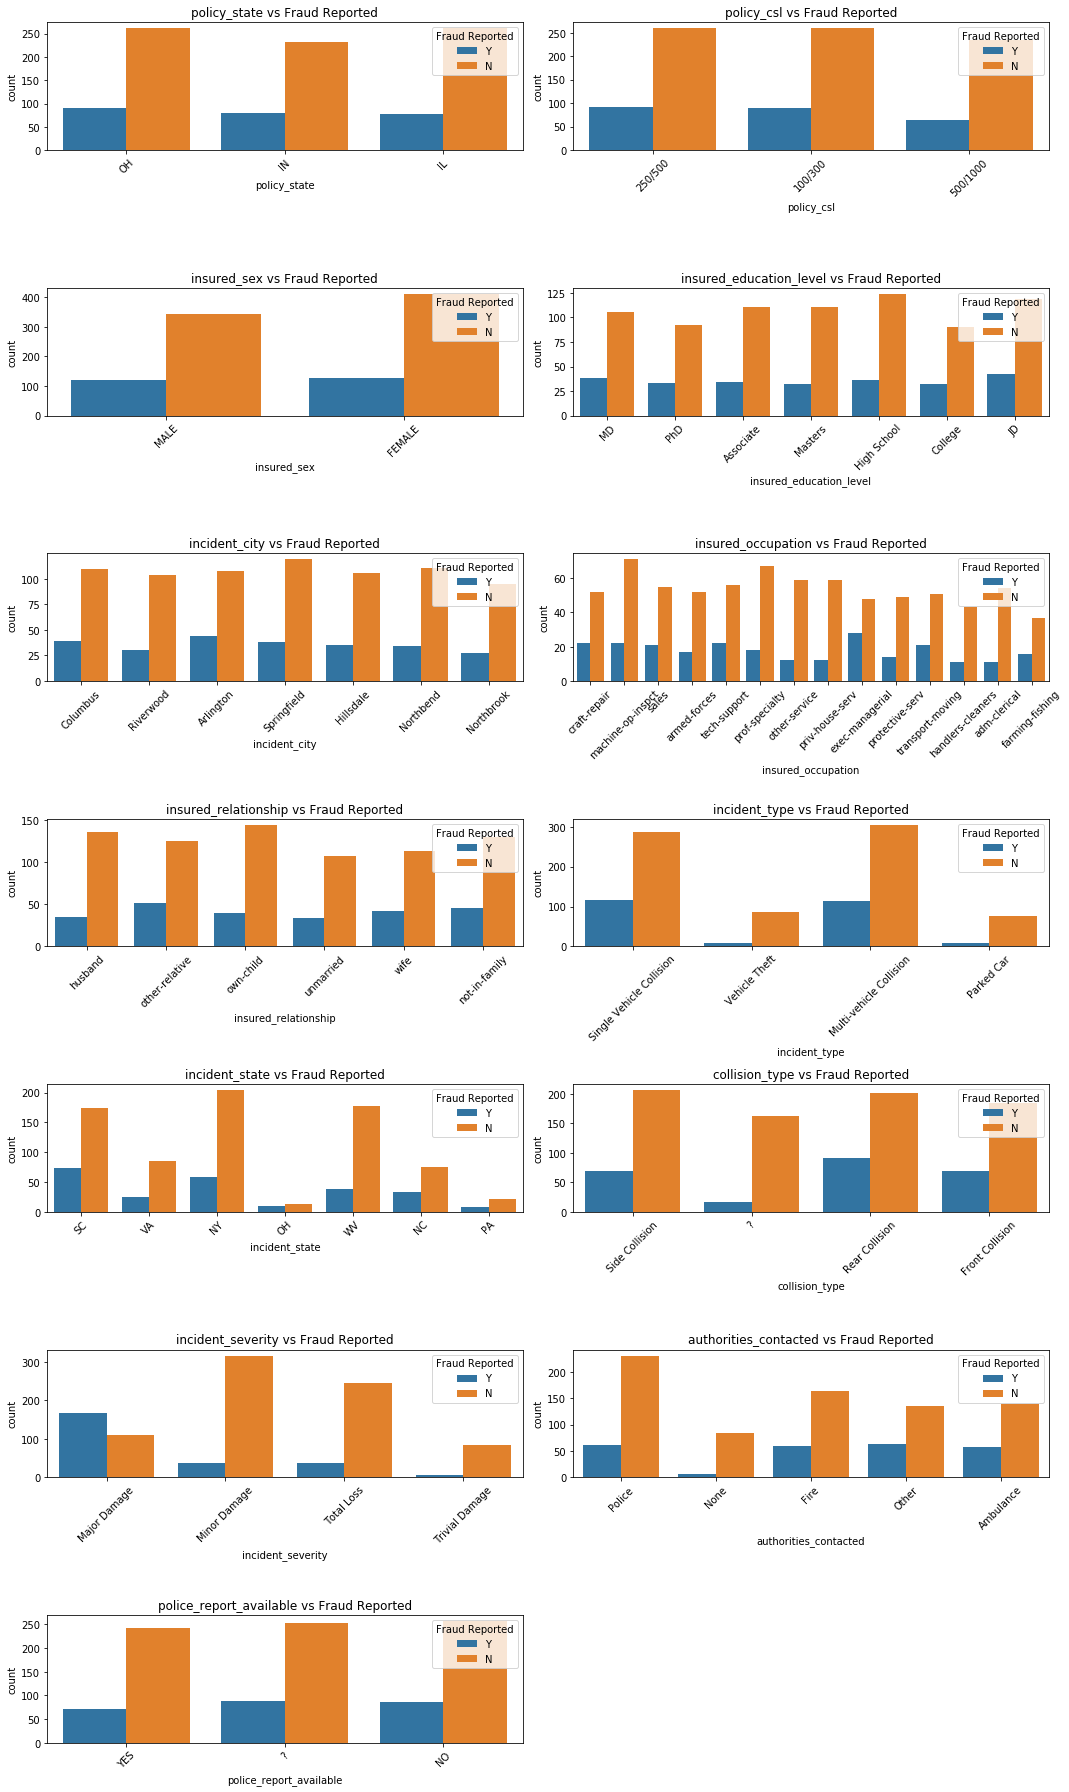

In [20]:
# visualize target variable and other columns
# Selected categorical columns
categorical_columns = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'incident_city',
                       'insured_occupation', 'insured_relationship', 'incident_type', 'incident_state',
                       'collision_type', 'incident_severity', 'authorities_contacted','police_report_available']

num_rows = (len(categorical_columns)+1)//2

plt.figure(figsize=(15,25))

for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(x=col, hue='fraud_reported', data=claim_data)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Fraud Reported')
    plt.legend(title='Fraud Reported', loc='upper right')

plt.tight_layout()
plt.show()

**Policy State vs Fraud Reported:**
This plot shows if certain policy states are more prone to fraud reports. It helps identify if the geographical location (policy state) has an impact on fraud reporting.

**Policy CSL vs Fraud Reported:**
This plot examines whether the coverage limit (Combined Single Limit) affects fraud reporting. It shows if specific coverage levels are more or less likely to involve fraud reports.

**Insured Sex vs Fraud Reported:**
This plot explores if gender plays a role in fraud reporting. It indicates whether one gender is more likely to report fraud than the other.

**Insured Education Level vs Fraud Reported:**
This plot investigates the connection between the level of education and fraud reporting. It helps identify if certain education levels are more associated with fraud reports.

**Incident City vs Fraud Reported:**
This plot visualizes whether the city where the incident occurred influences fraud reporting. It helps identify if incidents in certain cities are more prone to fraud reports.

**Insured Occupation vs Fraud Reported:**
This plot examines whether the type of occupation is related to fraud reporting. It reveals if particular occupations are more or less likely to involve fraud reports.

**Insured Relationship vs Fraud Reported:**
This plot explores whether the insured's relationship status influences fraud reporting. It indicates if certain relationship statuses are more associated with fraud reports.

**Incident Type vs Fraud Reported:**
This plot illustrates the distribution of fraud reports across different incident types. It helps identify which types of incidents are more prone to fraud.

**Incident State vs Fraud Reported:**
This plot shows if certain incident states are more prone to fraud reports. It helps identify if the geographical location (incident state) has an impact on fraud reporting.

**Collision Type vs Fraud Reported:**
This plot investigates if the type of collision affects fraud reporting. It shows if certain collision types have a higher likelihood of involving fraud.

**Incident Severity vs Fraud Reported:**
This plot examines whether the severity of incidents is related to fraud reporting. It shows if more severe incidents are more associated with fraud reports.

**Authorities Contacted vs Fraud Reported:**
This plot visualizes the distribution of reported fraud across different authorities contacted after an incident. It helps identify if certain contacts are more likely to be associated with fraud reports.

**Police Report Available vs Fraud Reported:**
This plot shows if the availability of a police report is related to fraud reporting. It helps understand whether incidents with available police reports are more likely to involve fraud reports

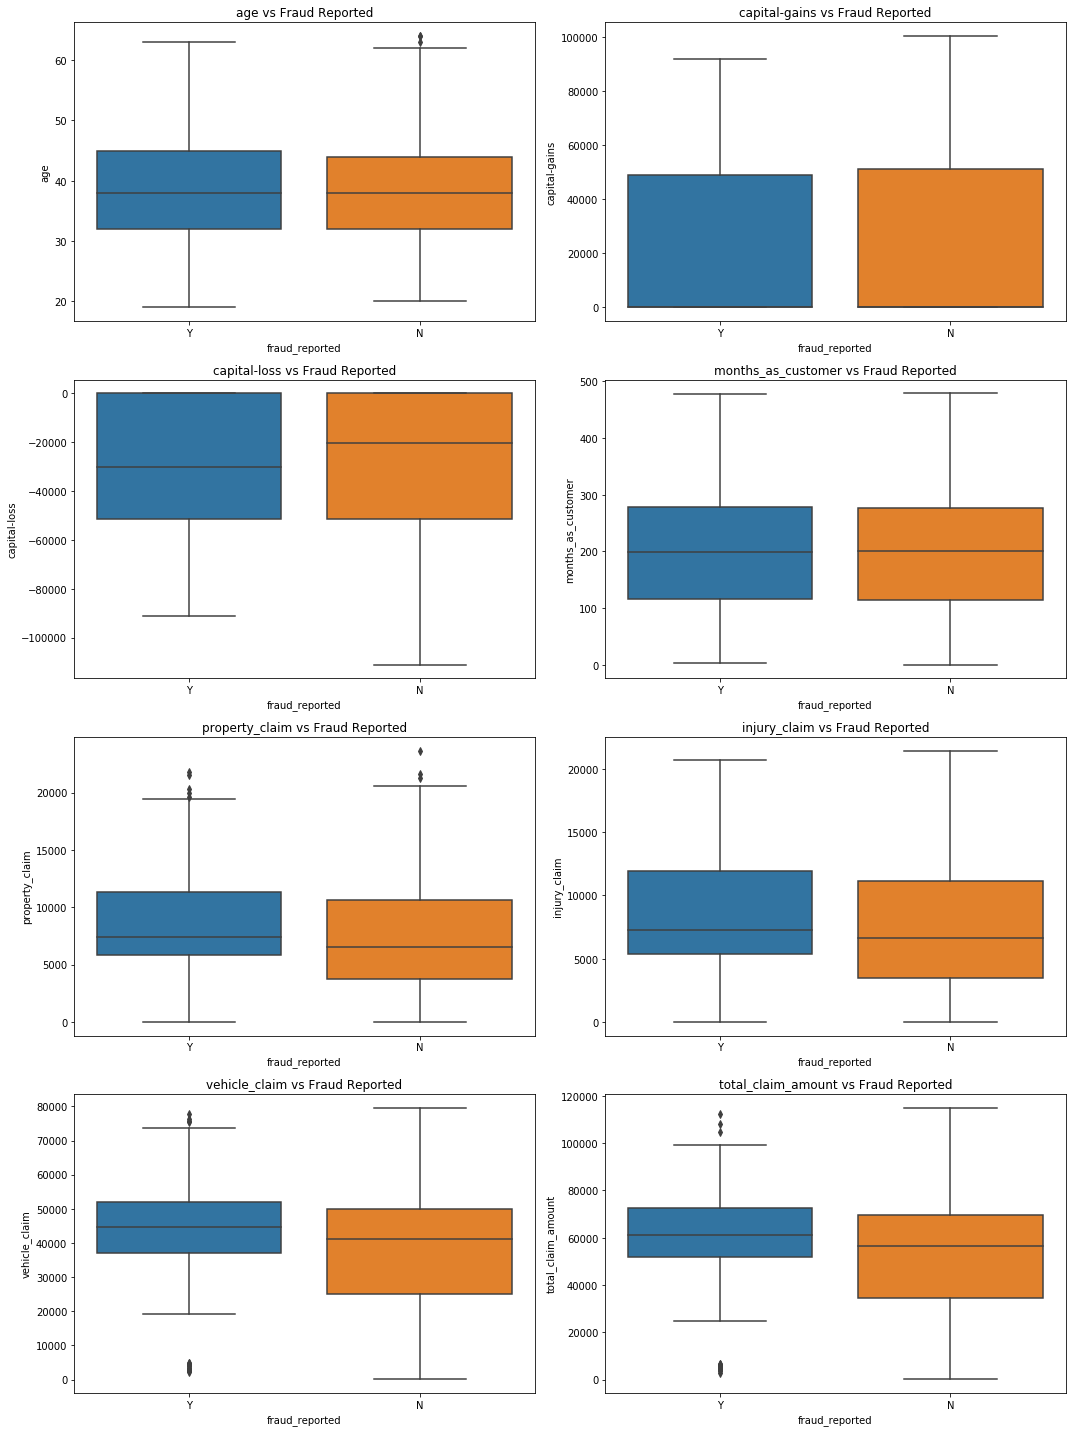

In [21]:
num_col=['age','capital-gains','capital-loss','months_as_customer','property_claim',
         'injury_claim','vehicle_claim','total_claim_amount']

num_rows = (len(num_col) + 1) // 2

plt.figure(figsize=(15,20))

for i, col in enumerate(num_col, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='fraud_reported', y=col, data=claim_data)
    plt.title(f'{col} vs Fraud Reported')

plt.tight_layout()
plt.show()

**Age vs Fraud Reported:**
This boxplot compares the distribution of ages for reported fraud (Y) and not reported fraud (N). It helps identify if there's a difference in age distribution between the two groups.

**Capital Gains vs Fraud Reported:**
This boxplot compares the distribution of capital gains for reported fraud and not reported fraud. It helps understand if capital gains are significantly different for fraud and non-fraud cases.

**Capital Loss vs Fraud Reported:**
This boxplot compares the distribution of capital losses for reported fraud and not reported fraud. It helps identify any patterns in capital losses with respect to fraud reports.

**Months as Customer vs Fraud Reported:**
This boxplot shows if there's a difference in the distribution of months as a customer between fraud and non-fraud cases. It helps understand if longer or shorter customer relationships are related to fraud reports.

**Property Claim vs Fraud Reported:**
This boxplot compares the distribution of property claim amounts for reported fraud and not reported fraud. It helps identify if property claims are significantly different for fraud and non-fraud cases.

**Injury Claim vs Fraud Reported:**
This boxplot shows if there's a difference in the distribution of injury claim amounts between fraud and non-fraud cases. It helps understand if injury claims are related to fraud reports.

**Vehicle Claim vs Fraud Reported:**
This boxplot compares the distribution of vehicle claim amounts for reported fraud and not reported fraud. It helps identify if vehicle claims are significantly different for fraud and non-fraud cases.

**Total Claim Amount vs Fraud Reported:**
This boxplot compares the distribution of total claim amounts for reported fraud and not reported fraud. It helps understand if the overall claim amount is significantly different for fraud and non-fraud cases.

In [22]:
claim_data = claim_data.drop(['policy_number','policy_bind_date','insured_zip','insured_hobbies',
                              'incident_location','incident_hour_of_the_day'], axis=1)
claim_data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [23]:
claim_data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [24]:
# Create an empty list to store columns with '?' values
columns_with_missing_value = []

# Loop through each column in the dataset
for column in claim_data.columns:
    if '?' in claim_data[column].values:
        columns_with_missing_value.append(column)

# Print the value count for columns with '?' values
for i in columns_with_missing_value:
    print(claim_data[i].value_counts())
    print()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64



In [25]:
# replacing this '?' to 'other'
claim_data[columns_with_missing_value] = claim_data[columns_with_missing_value].replace('?','Other')


In [28]:
claim_data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [26]:
claim_data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,Other,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [29]:
cat = claim_data.select_dtypes(include=['object'])

In [30]:
# using label encoder to convert categorical column to numerical in dataset
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat:
    claim_data[col] = label_encoder.fit_transform(claim_data[col])

# Display the updated dataset
claim_data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,1,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1,0,6500,1300,650,4550,0,31,2009,0


In [31]:
# splitting data into X and y
X = claim_data.drop('fraud_reported', axis=1)
y = claim_data['fraud_reported']

In [32]:
# checking for shewness
X.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
number_of_vehicles_involved    0.502664
property_damage                0.064799
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967


In [33]:
# finding and transforming outliers
# Iterate over each column in X
for col in X.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X[col], 25)
    Q3 = np.percentile(X[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X[col] = np.where(X[col] < lower_threshold, lower_threshold, X[col])
    X[col] = np.where(X[col] > upper_threshold, upper_threshold, X[col])

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X_s,y, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (700, 32)
X_test shape (300, 32)
y_train shape (700,)
y_test shape (300,)


The data in the target variable is imbalanced. We will increase the number of samples in the minority classes by replicating or generating synthetic samples. By doing so, oversampling aims to balance the class distribution and improve the model's ability to learn from the minority class. Here we will use SMOTE method for oversampling.

In [35]:
# oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [36]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (1066, 32)
X_test shape (300, 32)
y_train shape (1066,)
y_test shape (300,)


In [37]:
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier(n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100)),
    ('SVM', SVC()),
    ('NaiveBayes', GaussianNB()),
    ('LogisticRegression', LogisticRegression())]

scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

for name, model in models:
    print("Model: ", str(model))
    print("\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    # Calculate the scores
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Add scores to the DataFrame
    scores_df = scores_df.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}, ignore_index=True)

print(scores_df)


Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


[[ 85 135]
 [ 23  57]]
              precision    recall  f1-score   support

           0       0.79      0.39      0.52       220
           1       0.30      0.71      0.42        80

   micro avg       0.47      0.47      0.47       300
   macro avg       0.54      0.55      0.47       300
weighted avg       0.66      0.47      0.49       300

Model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


[[173  47]
 [ 51  29]]
              precision    recall  f1-score   support

           0       0.77      0.79  

Random Forest model has the highest accuracy (75.67%) and F1 Score (74.38%), indicating it performs the best among the models for this specific task.

In [38]:
# checking cv score for different classifiers
for name, model in models:
    cv_score = cross_val_score(model, X_s, y, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Difference between accuracy and cv score is: ", accuracy-cv_score.mean())
    print("\n")

Model : KNeighbors
cv_score : [0.74626866 0.70149254 0.685      0.74874372 0.70351759]
Mean Score 0.7170045001125028
Difference between accuracy and cv score is:  -0.017004500112502874


Model : DecisionTree
cv_score : [0.71641791 0.74129353 0.725      0.73869347 0.75376884]
Mean Score 0.7350347508687717
Difference between accuracy and cv score is:  -0.035034750868771725


Model : RandomForest
cv_score : [0.76119403 0.76119403 0.735      0.7839196  0.79396985]
Mean Score 0.7670555013875346
Difference between accuracy and cv score is:  -0.06705550138753469


Model : AdaBoost
cv_score : [0.76119403 0.76119403 0.745      0.7638191  0.77889447]
Mean Score 0.7620203255081377
Difference between accuracy and cv score is:  -0.06202032550813774


Model : SVM
cv_score : [0.7761194  0.76616915 0.735      0.77386935 0.75879397]
Mean Score 0.7619903747593689
Difference between accuracy and cv score is:  -0.06199037475936897


Model : NaiveBayes
cv_score : [0.7761194  0.68656716 0.665      0.7587939

Based on these metrics, Logistic Regression appears to be the best model in terms of mean cross-validation score and a relatively lower difference between accuracy and cross-validation score. 

#### Logistic Regression has the highest mean cross-validation score (78.91%) and, while it does have a relatively larger difference between accuracy and cross-validation score compared to some other models, it still performs well in terms of accuracy and consistency.

In [39]:
# Hyper parameter tuning

# Defining the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
# Get the best parameters and the best score
print("best_params",grid_search.best_params_)
print()
print("best_score",grid_search.best_score_)

best_params {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

best_score 0.801125703564728


In [41]:
# final model
final = LogisticRegression(C=0.01, penalty='l1', solver='saga')
final.fit(X_train, y_train)
final_pred = final.predict(X_test)
print("Accuracy_final :", accuracy_score(y_test,final_pred)*100)

Accuracy_final : 79.0


Area : 0.7379545454545455


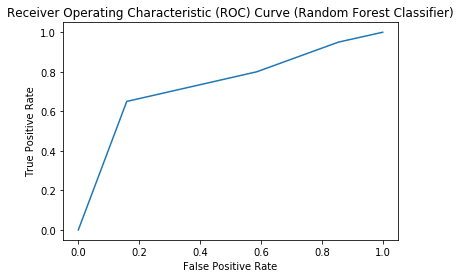

AUC_Score : 0.7454545454545455


In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# calculating predicted probabilities for the positive class
y_pred_probs = final.predict_proba(X_test)[:, 1]

#Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr,tpr)
print("Area :",roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest Classifier)')
plt.show()

# Calculate the AUC-ROC score using roc_auc_score
auc_score = roc_auc_score(y_test, final_pred)
print("AUC_Score :",auc_score)

In [43]:
# saving the model
import joblib
joblib.dump(final, "Insurance_Fraud.pkl")

['Insurance_Fraud.pkl']

In [44]:
# predicting on the X_test with the saved model
#loading the aved model
model = joblib.load("Insurance_Fraud.pkl")

# prediction
prediction = model.predict(X_test)
prediction[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [45]:
# comparing actual values and predicted values
pred = pd.DataFrame({'predicted':prediction, 'actual':y_test})
pred.head(10)

,predicted,actual
521,0,0
737,0,0
740,0,0
660,0,0
411,0,0
678,0,0
626,1,0
513,0,1
859,0,0
136,0,0


The final Logistic Regression model appears to perform well in terms of accuracy and AUC-ROC score, indicating its suitability for the task.